# Fuzzy Control System

A control system is an arrangement of physical components designed to alter another physical system so that this system exhibits certain desired characteristics. 

## Steps in Designing Fuzzy Control System

Following are the steps involved in designing Fuzzy Control System −

1. Identification of variables − Here, the input, output and state variables must be identified of the plant which is under consideration.

2. Fuzzy subset configuration − The universe of information is divided into number of fuzzy subsets and each subset is assigned a linguistic label. Always make sure that these fuzzy subsets include all the elements of universe.

3. Obtaining membership function − Now obtain the membership function for each fuzzy subset that we get in the above step. A fuzzy set $\tilde{A}$ in the universe of information $U$, where $\mu_{\tilde{A}}(y)$ maps $U$, with respect to $y$, to membership space.


$$
\Large\tilde{A} = \{(y,\mu_{\tilde{A}}(y)) | y \in U\}
$$



4. Fuzzy rule base configuration − Now formulate the fuzzy rule base by assigning relationship between fuzzy input and output.

5. Fuzzification − The fuzzification process is initiated in this step.

6. Combining fuzzy outputs − By applying fuzzy approximate reasoning, locate the fuzzy output and merge them.

7. Defuzzification − Finally, initiate defuzzification process to form a crisp output.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), "quality")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")

In [3]:
tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")

In [4]:
quality.automf(3) # Poor, average, good
service.automf(3) # Poor, average, good

In [5]:
# Manual Functions
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

D:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
D:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


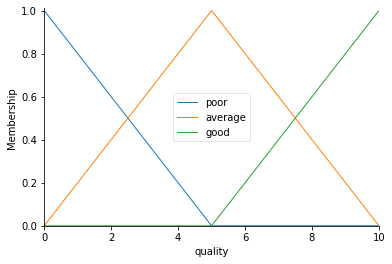

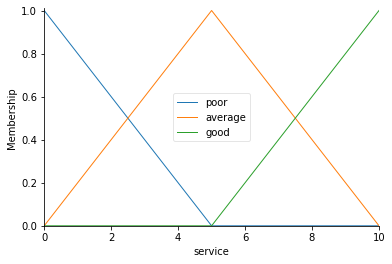

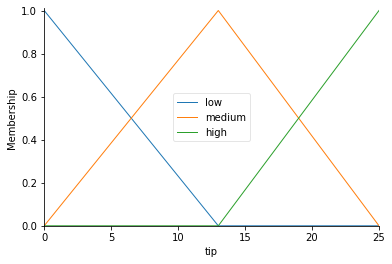

In [6]:
quality.view()
service.view()
tip.view()

In [7]:
def rule_generator(quality, service, op, tip):
    return quality[quality]

In [8]:
# Inference rule set
rules = [
    ctrl.Rule(quality['poor'] & service['poor'], tip['low']),
    ctrl.Rule(quality['good'] & service['good'], tip['high']),
    ctrl.Rule(quality['average'] | service['good'], tip['medium']),
]

In [9]:
tip_ct = ctrl.ControlSystem(rules)
tipping = ctrl.ControlSystemSimulation(tip_ct)

In [10]:
tipping.input['quality'] = 6
tipping.input['service'] = 8
tipping.compute()
print("Tip should be around", tipping.output['tip'])

Tip should be around 12.889795918367348


D:\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


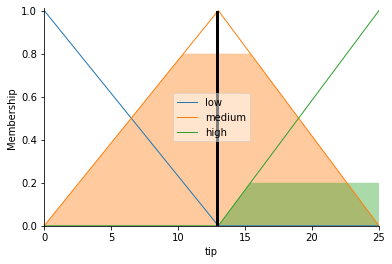

In [11]:
tip.view(sim=tipping)